# PREPROCESSING AND LINEAR REGRESSION

In [60]:
!pip install requests && pip install tabulate && pip install "colorama>=0.3.8" && pip install future


In [61]:
!pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o


Looking in links: http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html


In [62]:
min_mem_size = 6; run_time = 222


In [63]:
!pip install psutil

In [64]:
import psutil  # Make sure to import psutil

pct_memory = 0.5
virtual_memory = psutil.virtual_memory()
min_mem_size = int(round(int(pct_memory * virtual_memory.available) / 1073741824, 0))
print(min_mem_size)


5


In [66]:
import random
import logging
import sys
import h2o
import psutil

logging.basicConfig(level=logging.INFO)

pct_memory = 0.5
virtual_memory = psutil.virtual_memory()
min_mem_size = int(round(int(pct_memory * virtual_memory.available) / 1073741824, 0))

port_no = random.randint(5555, 55555)

try:
    h2o.init(strict_version_check=False, min_mem_size_GB=min_mem_size, port=port_no)
except Exception as e:
    logging.critical('Failed to initialize h2o: {}'.format(e))

    h2o.download_all_logs(dirname=logs_path, filename=logfile)
    h2o.cluster().shutdown()
    sys.exit(2)

Checking whether there is an H2O instance running at http://localhost:19481..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.22" 2024-01-16; OpenJDK Runtime Environment (build 11.0.22+7-post-Ubuntu-0ubuntu222.04.1); OpenJDK 64-Bit Server VM (build 11.0.22+7-post-Ubuntu-0ubuntu222.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpc5tjg6r2
  JVM stdout: /tmp/tmpc5tjg6r2/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpc5tjg6r2/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:19481
Connecting to H2O server at http://127.0.0.1:19481 ... successful.


H2O_cluster_uptime:,08 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.1
H2O_cluster_version_age:,4 days
H2O_cluster_name:,H2O_from_python_unknownUser_kxcv4b
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,4 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [67]:
!pip install h2o
%matplotlib inline
import random, os, sys
import h2o
import pandas
import pprint
import operator
import matplotlib
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.estimators.random_forest import H2ORandomForestEstimator
from h2o.estimators.deeplearning import H2ODeepLearningEstimator
from tabulate import tabulate
from h2o.automl import H2OAutoML
from datetime import datetime
import logging
import csv
import optparse
import time
import json
from distutils.util import strtobool
import psutil
import numpy as np

<ipython-input-3-943f1ed9c312>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data_no.corr(),annot=True)


<Axes: >

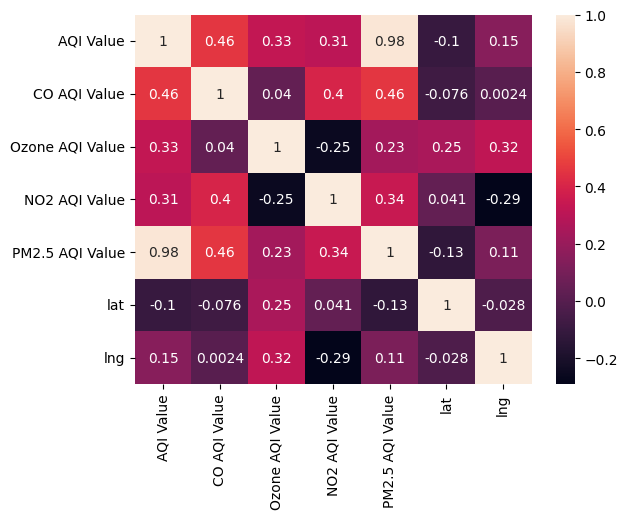

In [3]:
import pandas as pd
import seaborn as sns
data_no= pd.read_csv( '/content/AQI and Lat Long of Countries.csv' )
sns.heatmap(data_no.corr(),annot=True)

In [49]:
data_no.head(10)

,Country,City,AQI Value,AQI Category,CO AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,lng,Ozone AQI Value_squared,NO2 AQI Value_squared,PM2.5 AQI Value_squared
0,0.751445,0.711645,0.089249,0.4,0.007519,0.00,0.000000,0.0,0.603851,0.026297,0.000000,0.010404
1,0.127168,0.712648,0.068966,0.0,0.007519,0.00,0.010989,0.0,0.341281,0.000507,0.000121,0.006724
2,0.127168,0.712648,0.068966,0.0,0.007519,0.00,0.010989,0.0,0.348692,0.000507,0.000121,0.006724
3,0.433526,0.714224,0.119675,0.4,0.007519,0.00,0.021978,0.0,0.517940,0.030862,0.000483,0.017424
4,0.710983,0.715657,0.054767,0.0,0.007519,0.00,0.000000,0.0,0.534814,0.023456,0.000000,0.001600
5,0.959538,0.719384,0.095335,0.4,0.007519,0.00,0.120879,0.0,0.210083,0.003977,0.014612,0.011664
6,0.959538,0.719384,0.095335,0.4,0.007519,0.00,0.120879,0.0,0.230084,0.003977,0.014612,0.011664
7,0.086705,0.720817,0.115619,0.4,0.007519,0.00,0.076923,0.0,0.485662,0.017064,0.005917,0.016384
8,0.751445,0.721175,0.095335,0.4,0.007519,0.00,0.010989,0.0,0.600487,0.034108,0.000121,0.011664
9,0.190751,0.722393,0.123732,0.4,0.015038,0.25,0.010989,0.0,0.794543,0.093824,0.000121,0.013456


In [5]:
interactive = True
if not interactive: matplotlib.use('Agg', warn=False)
import matplotlib.pyplot as plt

In [32]:
data_no.isnull().sum()


Country               302
City                    0
AQI Value               0
AQI Category            0
CO AQI Value            0
CO AQI Category         0
Ozone AQI Value         0
Ozone AQI Category      0
NO2 AQI Value           0
NO2 AQI Category        0
PM2.5 AQI Value         0
PM2.5 AQI Category      0
lat                     0
lng                     0
dtype: int64

In [34]:
data_no = data_no.dropna(subset=['Country'])


In [35]:
from sklearn.preprocessing import LabelEncoder

label_encoder_country = LabelEncoder()
data_no['Country'] = label_encoder_country.fit_transform(data_no['Country'])

# Label encoding for 'City'
label_encoder_city = LabelEncoder()
data_no['City'] = label_encoder_city.fit_transform(data_no['City'])

In [36]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
data_no['AQI Category'] = LE.fit_transform(data_no['AQI Category'])
data_no['CO AQI Category'] = LE.fit_transform(data_no['CO AQI Category'])
data_no['Ozone AQI Category'] = LE.fit_transform(data_no['Ozone AQI Category'])
data_no['PM2.5 AQI Category'] = LE.fit_transform(data_no['PM2.5 AQI Category'])
data_no['NO2 AQI Category'] = LE.fit_transform(data_no['NO2 AQI Category'])

In [37]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()

from sklearn.preprocessing import MinMaxScaler

In [38]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Select only numerical columns for normalization
numerical_columns = data_no.select_dtypes(include=['int64', 'float64']).columns

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler to the numerical columns and transform the data
data_no[numerical_columns] = scaler.fit_transform(data_no[numerical_columns])

# 'data_no' has the normalized features in the range [0, 1]

In [39]:
!pip install statsmodels


In [41]:
import numpy as np
import pandas as pd
import statsmodels.api as sm


# Apply log transformation to the variables where it makes sense and where all values are positive
log_vars = ['CO AQI Value', 'Ozone AQI Value', 'NO2 AQI Value', 'PM2.5 AQI Value']
for var in log_vars:
    if (data_no[var] <= 0).any():
        print(f"Cannot perform log transform on {var} because it contains non-positive values.")
    else:
        data_no['log_' + var] = np.log(data_no[var])

X_columns = ['Country', 'City', 'AQI Category', 'CO AQI Category', 'Ozone AQI Category',
             'NO2 AQI Category', 'lat', 'lng']
for var in log_vars:
    X_columns.append('log_' + var if 'log_' + var in data_no else var)

X = data_no[X_columns]

X = sm.add_constant(X)

y = data_no['AQI Value']

model = sm.OLS(y, X).fit()

print(model.summary())

Cannot perform log transform on CO AQI Value because it contains non-positive values.
Cannot perform log transform on Ozone AQI Value because it contains non-positive values.
Cannot perform log transform on NO2 AQI Value because it contains non-positive values.
Cannot perform log transform on PM2.5 AQI Value because it contains non-positive values.
                            OLS Regression Results                            
Dep. Variable:              AQI Value   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                 4.880e+04
Date:                Sun, 17 Mar 2024   Prob (F-statistic):               0.00
Time:                        23:29:25   Log-Likelihood:                 46156.
No. Observations:               16393   AIC:                        -9.229e+04
Df Residuals:                   16380   BIC:                        -9.219e+04
Df Model:        

 Log Transformation:

The variables 'CO AQI Value', 'Ozone AQI Value', 'NO2 AQI Value', and 'PM2.5 AQI Value' have been log-transformed to potentially normalize their distributions and better capture relationships that are exponential in nature.



In [42]:
import numpy as np
import pandas as pd
import statsmodels.api as sm


for var in ['CO AQI Value', 'Ozone AQI Value', 'NO2 AQI Value', 'PM2.5 AQI Value', 'lat', 'lng']:
    data_no[var + '_squared'] = data_no[var] ** 2

# Defining independent variables including the polynomial terms
X = data_no[['Country', 'City', 'AQI Category', 'CO AQI Value', 'CO AQI Category',
        'Ozone AQI Value', 'Ozone AQI Category', 'NO2 AQI Value', 'NO2 AQI Category',
        'PM2.5 AQI Value', 'lat', 'lng',
        'CO AQI Value_squared', 'Ozone AQI Value_squared', 'NO2 AQI Value_squared',
        'PM2.5 AQI Value_squared', 'lat_squared', 'lng_squared']]

X = sm.add_constant(X)

y = data_no['AQI Value']

# Fit the OLS model with the independent variables
model = sm.OLS(y, X).fit()

# Print out the summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              AQI Value   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                 4.252e+04
Date:                Sun, 17 Mar 2024   Prob (F-statistic):               0.00
Time:                        23:29:30   Log-Likelihood:                 48301.
No. Observations:               16393   AIC:                        -9.656e+04
Df Residuals:                   16374   BIC:                        -9.642e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    5

Quadratic Terms:

Square terms for 'CO AQI Value', 'Ozone AQI Value', 'NO2 AQI Value', 'PM2.5 AQI Value', 'lat', and 'lng' have been created and included in the model to account for potential non-linear relationships.


Model Fitting:

An Ordinary Least Squares (OLS) regression model has been fitted with both log-transformed predictors and quadratic terms.
The model includes country and city as categorical variables, along with AQI categories for various pollutants.
Latitude ('lat') and longitude ('lng') are included in their original and squared form, which might capture spatial patterns in AQI.
A constant term has been added to the model to account for the intercept.

In [43]:
features_to_drop = [
    'CO AQI Category', 'Ozone AQI Value', 'PM2.5 AQI Value',
    'lat', 'CO AQI Value_squared', 'lat_squared'
]

data_no.drop(columns=features_to_drop, inplace=True)


In [44]:
data_no.drop(columns=['lng_squared'], inplace=True)


In [45]:
data_no = data_no.drop(columns=['PM2.5 AQI Category'])


In [46]:
data_no.corr()

,Country,City,AQI Value,AQI Category,CO AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,lng,Ozone AQI Value_squared,NO2 AQI Value_squared,PM2.5 AQI Value_squared
Country,1.000000,0.001385,-0.077590,-0.024832,-0.006728,-0.145514,0.245784,-0.008613,-0.328749,-0.113200,0.148395,-0.073717
City,0.001385,1.000000,-0.002855,-0.009050,-0.005494,0.008149,0.018423,-0.009785,0.053998,0.014988,0.014823,-0.008131
AQI Value,-0.077590,-0.002855,1.000000,0.689964,0.458529,0.404370,0.308275,0.164559,0.155514,0.391202,0.290917,0.889362
AQI Category,-0.024832,-0.009050,0.689964,1.000000,0.272764,0.321740,0.347898,0.035345,0.050579,0.257216,0.254494,0.402248
CO AQI Value,-0.006728,-0.005494,0.458529,0.272764,1.000000,0.129952,0.398974,0.513684,0.003489,0.127801,0.444358,0.489388
Ozone AQI Category,-0.145514,0.008149,0.404370,0.321740,0.129952,1.000000,-0.066159,-0.006194,0.243363,0.843388,-0.046321,0.248271
NO2 AQI Value,0.245784,0.018423,0.308275,0.347898,0.398974,-0.066159,1.000000,0.248522,-0.290050,-0.093859,0.853346,0.226999
NO2 AQI Category,-0.008613,-0.009785,0.164559,0.035345,0.513684,-0.006194,0.248522,1.000000,0.019495,-0.010104,0.530883,0.253910
lng,-0.328749,0.053998,0.155514,0.050579,0.003489,0.243363,-0.290050,0.019495,1.000000,0.251264,-0.147040,0.125221
Ozone AQI Value_squared,-0.113200,0.014988,0.391202,0.257216,0.127801,0.843388,-0.093859,-0.010104,0.251264,1.000000,-0.074709,0.230495


In [47]:
import statsmodels.api as sm

model = sm.OLS(data_no['AQI Value'], data_no[['Country', 'City', 'AQI Category', 'CO AQI Value',
       'Ozone AQI Category', 'NO2 AQI Value', 'NO2 AQI Category', 'lng',
       'Ozone AQI Value_squared', 'NO2 AQI Value_squared',
       'PM2.5 AQI Value_squared']]).fit()

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              AQI Value   R-squared (uncentered):                   0.973
Model:                            OLS   Adj. R-squared (uncentered):              0.973
Method:                 Least Squares   F-statistic:                          5.453e+04
Date:                Sun, 17 Mar 2024   Prob (F-statistic):                        0.00
Time:                        23:29:39   Log-Likelihood:                          38247.
No. Observations:               16393   AIC:                                 -7.647e+04
Df Residuals:                   16382   BIC:                                 -7.639e+04
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Country                     0.0194      0.001     37.623      0.000       0.018       0.020
City                        0.0134      0.001     22.591      0.000       0.012       0.015
AQI Category                0.1275      0.001    147.066      0.000       0.126       0.129
CO AQI Value                0.0109      0.014      0.780      0.436      -0.016       0.038
Ozone AQI Category         -0.0181      0.003     -5.727      0.000      -0.024      -0.012
NO2 AQI Value               0.1745      0.007     25.596      0.000       0.161       0.188
NO2 AQI Category           -0.0882      0.011     -8.367      0.000      -0.109      -0.068
lng                         0.0506      0.001     71.870      0.000       0.049       0.052
Ozone AQI Value_squared     0.1734      0.005     37.232      0.000       0.164       0.183
NO2 AQI Value_squared      -0.2621      0.021    -12.551      0.000      -0.303      -0.221
PM2.5 AQI Value_squared     1.2357      0.004    275.255      0.000       1.227       1.244
==============================================================================
Omnibus:                     6073.978   Durbin-Watson:                   1.618
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           383328.448
Skew:                          -0.954   Prob(JB):                         0.00
Kurtosis:                      26.613   Cond. No.                         123.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
import statsmodels.api as sm

# First, add a constant term to your predictor variables.
X_with_constant = sm.add_constant(data_no[['Country', 'City', 'AQI Category', 'CO AQI Value',
                                           'Ozone AQI Category', 'NO2 AQI Value', 'NO2 AQI Category', 'lng',
                                           'Ozone AQI Value_squared', 'NO2 AQI Value_squared',
                                           'PM2.5 AQI Value_squared']])

# Then, create the model using the modified predictors.
model = sm.OLS(data_no['AQI Value'], X_with_constant).fit()

# Print out the statistics
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              AQI Value   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                 2.425e+04
Date:                Sun, 17 Mar 2024   Prob (F-statistic):               0.00
Time:                        23:29:42   Log-Likelihood:                 39974.
No. Observations:               16393   AIC:                        -7.992e+04
Df Residuals:                   16381   BIC:                        -7.983e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.0431      0.001     61.990      0.000       0.042       0.044
Country                    -0.0019      0.001     -3.339      0.001      -0.003      -0.001
City                        0.0003      0.001      0.438      0.661      -0.001       0.001
AQI Category                0.1203      0.001    152.570      0.000       0.119       0.122
CO AQI Value               -0.0373      0.013     -2.963      0.003      -0.062      -0.013
Ozone AQI Category         -0.0067      0.003     -2.367      0.018      -0.012      -0.001
NO2 AQI Value               0.0921      0.006     14.671      0.000       0.080       0.104
NO2 AQI Category           -0.1240      0.010    -13.051      0.000      -0.143      -0.105
lng                         0.0130      0.001     14.777      0.000       0.011       0.015
Ozone AQI Value_squared     0.1679      0.004     40.042      0.000       0.160       0.176
NO2 AQI Value_squared      -0.0358      0.019     -1.872      0.061      -0.073       0.002
PM2.5 AQI Value_squared     1.2454      0.004    308.013      0.000       1.237       1.253
==============================================================================
Omnibus:                     7056.321   Durbin-Watson:                   1.683
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           830441.383
Skew:                          -1.078   Prob(JB):                         0.00
Kurtosis:                      37.802   Cond. No.                         177.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# RANDOM FOREST


In [119]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

X = data_no.drop('AQI Value', axis=1)
y = data_no['AQI Value']

# Splitting data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Making predictions
predictions = rf_model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, predictions)

print(f"Mean Squared Error for test: {mse}")


Mean Squared Error for test: 8.916402161087933e-06


In [120]:
# Making predictions on the training data
train_predictions = rf_model.predict(X_train)

# Evaluating the model on the training data
train_mse = mean_squared_error(y_train, train_predictions)
print(f"Mean Squared Error for Training Data: {train_mse}")


Mean Squared Error for Training Data: 1.6568831695187113e-06


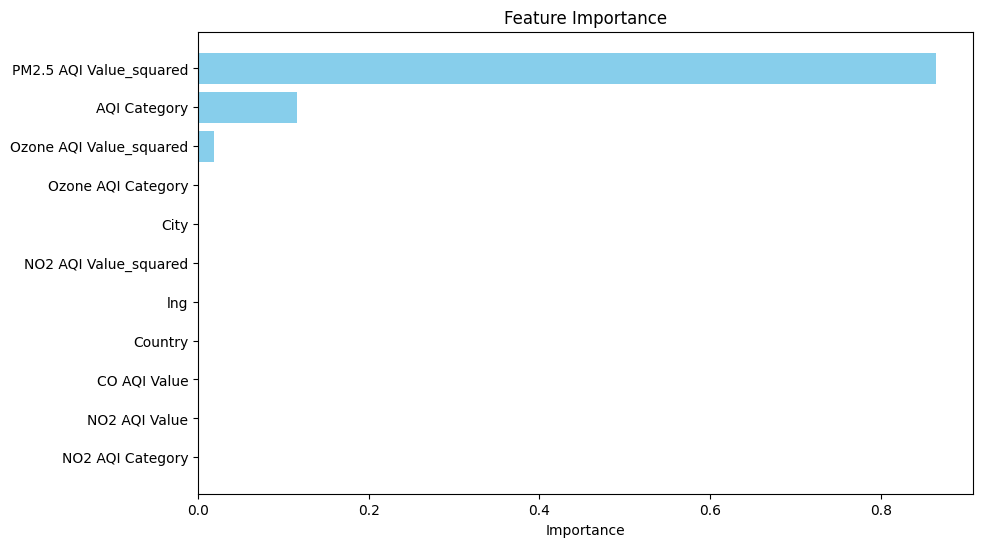

In [51]:
import matplotlib.pyplot as plt

# Assuming 'rf_model' is your trained Random Forest model and 'data' is your DataFrame
feature_importances = rf_model.feature_importances_
features = data_no.columns.drop('AQI Value')  # Replace with the actual name of your target variable

# Sort the feature importances in descending order
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_features = [features[i] for i in sorted_indices]
sorted_importances = feature_importances[sorted_indices]

# Plotting the feature importances
plt.figure(figsize=(10, 6))
plt.barh(sorted_features, sorted_importances, color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # Invert the y-axis to have the most important feature at the top
plt.show()


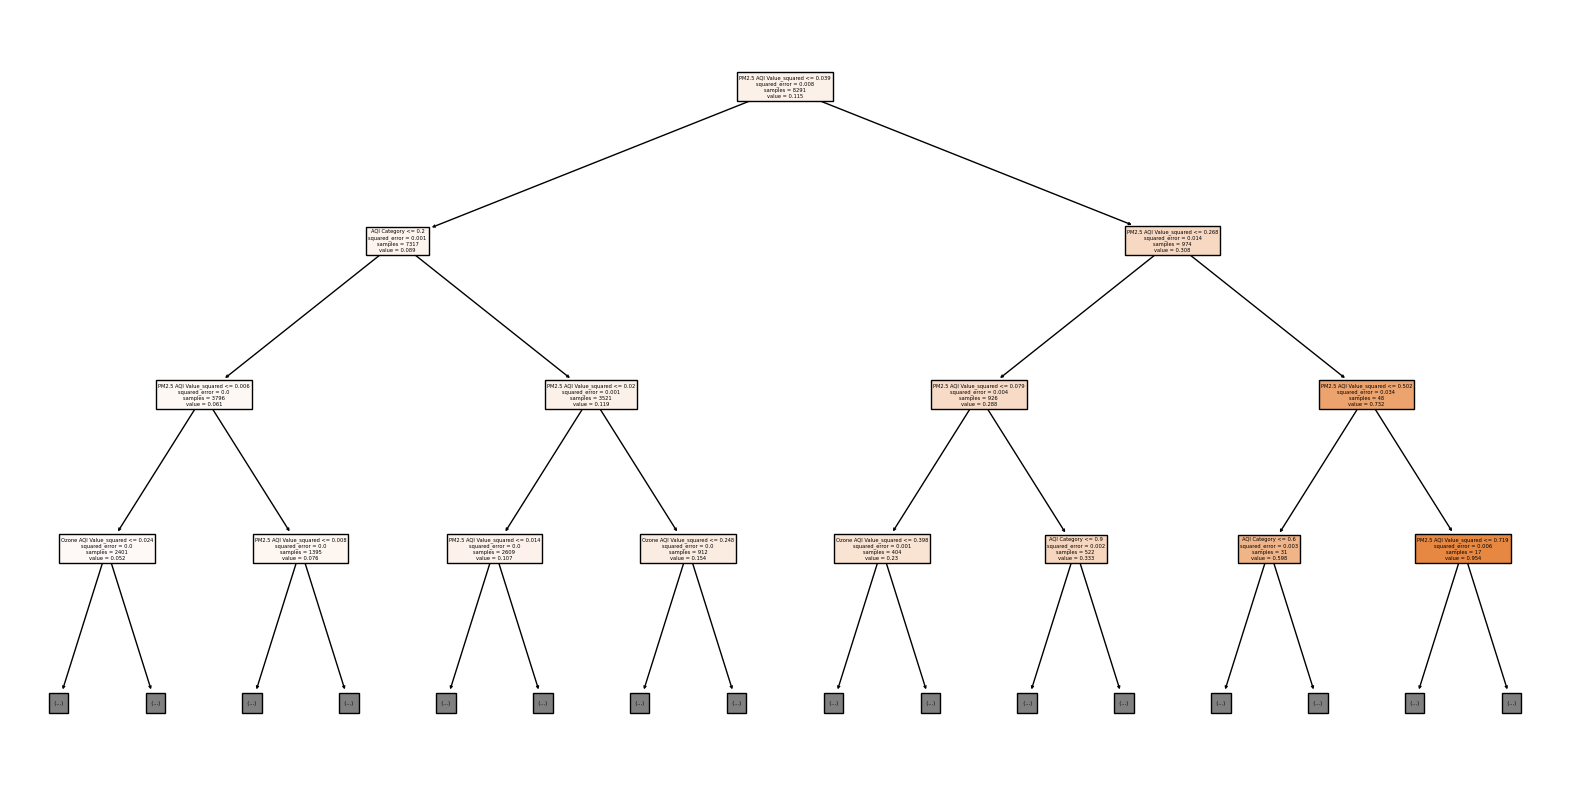

In [62]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Extract one of the trees from the forest
tree = rf_model.estimators_[0]

# Visualize the decision tree
plt.figure(figsize=(20,10))
plot_tree(tree, feature_names=X_train.columns, filled=True, max_depth=3)
plt.show()


In [57]:
data_no.head()

,Country,City,AQI Value,AQI Category,CO AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,lng,Ozone AQI Value_squared,NO2 AQI Value_squared,PM2.5 AQI Value_squared
0,0.751445,0.711645,0.089249,0.4,0.007519,0.0,0.000000,0.0,0.603851,0.026297,0.000000,0.010404
1,0.127168,0.712648,0.068966,0.0,0.007519,0.0,0.010989,0.0,0.341281,0.000507,0.000121,0.006724
2,0.127168,0.712648,0.068966,0.0,0.007519,0.0,0.010989,0.0,0.348692,0.000507,0.000121,0.006724
3,0.433526,0.714224,0.119675,0.4,0.007519,0.0,0.021978,0.0,0.517940,0.030862,0.000483,0.017424
4,0.710983,0.715657,0.054767,0.0,0.007519,0.0,0.000000,0.0,0.534814,0.023456,0.000000,0.001600


# AUTO ML

In [36]:
h2o.init(strict_version_check=False)


Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,34 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.1
H2O_cluster_version_age:,4 days
H2O_cluster_name:,H2O_from_python_unknownUser_ve71br
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [70]:
data_h = h2o.import_file( '/content/AQI and Lat Long of Countries.csv' )


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [71]:
data_h = h2o.H2OFrame(data_no)


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [76]:
from sklearn.model_selection import train_test_split

X = data_no.drop(['AQI Value'], axis=1)
y = data_no['AQI Value']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [77]:
import h2o
from h2o.automl import H2OAutoML

h2o.init()

# Convert the train and test sets to H2O Frames
h2o_train = h2o.H2OFrame(pd.concat([X_train, y_train], axis=1))
h2o_test = h2o.H2OFrame(pd.concat([X_test, y_test], axis=1))

# Define the target and features for the H2O AutoML
target = 'AQI Value'
features = [col for col in X.columns]

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,4 hours 29 mins
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.1
H2O_cluster_version_age:,4 days
H2O_cluster_name:,H2O_from_python_unknownUser_ve71br
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,2.970 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [79]:
automl = H2OAutoML(max_models=20, seed=1, max_runtime_secs=100, project_name='AQI_Prediction_Project')
automl.train(x=features, y=target, training_frame=h2o_train)

# View the AutoML Leaderboard
lb = automl.leaderboard
print(lb.head(rows=lb.nrows))  # Print all rows instead of default (10 rows)


AutoML progress: |
00:27:33.600: New models will be added to existing leaderboard AQI_Prediction_Project@@AQI_Value (leaderboard frame=null) with already 17 models.
00:27:45.480: New models will be added to existing leaderboard AQI_Prediction_Project@@AQI_Value (leaderboard frame=null) with already 17 models.

███████████████████████████████████████████████████████████████| (done) 100%
model_id                                               rmse          mse          mae       rmsle    mean_residual_deviance
GBM_3_AutoML_1_20240317_200150                   0.0038232   1.46169e-05  0.00132197   0.00263023               1.46169e-05
GBM_grid_1_AutoML_1_20240317_200150_model_2      0.00386669  1.49513e-05  0.00131303   0.00253298               1.49513e-05
GBM_4_AutoML_1_20240317_200150                   0.00390808  1.52731e-05  0.00126175   0.00261133               1.52731e-05
XGBoost_grid_1_AutoML_1_20240317_200150_model_3  0.00400818  1.60655e-05  0.000723341  0.00251165               1.6

In [80]:
# Predict on the test set using the best model
predictions = automl.leader.predict(h2o_test[features])

# Evaluate model performance
performance = automl.leader.model_performance(h2o_test)
print(performance)

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
ModelMetricsRegression: gbm
** Reported on test data. **

MSE: 1.4921165095157736e-05
RMSE: 0.003862792396072786
MAE: 0.0011745613668151678
RMSLE: 0.00238566684322173
Mean Residual Deviance: 1.4921165095157736e-05


# SHAP ANALYSIS

In [25]:
!pip install shap


In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

# Example dataset
X, y = np.arange(10).reshape((5, 2)), range(5)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)


LinearRegression()

PermutationExplainer explainer: 3280it [04:45, 11.23it/s]


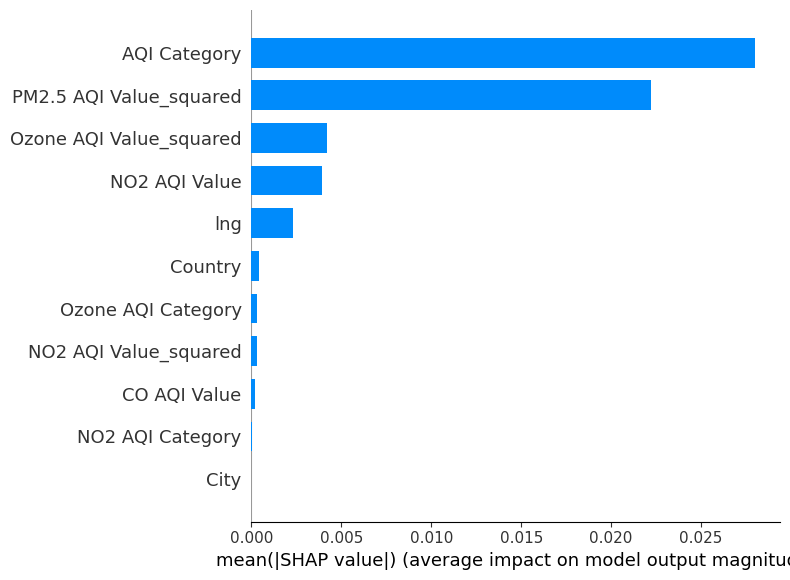

In [59]:
import shap
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

target_column = 'AQI Value'
X = data_no.drop(target_column, axis=1)
y = data_no[target_column]

# Split your data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Create a SHAP explainer
explainer = shap.Explainer(linear_model.predict, X_train)

# Compute SHAP values
shap_values = explainer(X_test)

# Set the plot size to be larger
plt.figure(figsize=(16, 10))

# Plot SHAP values with feature names displayed
shap.summary_plot(shap_values, X_test, plot_type="bar", feature_names=X_test.columns, max_display=X_test.shape[1])

# Show the plot
plt.show()

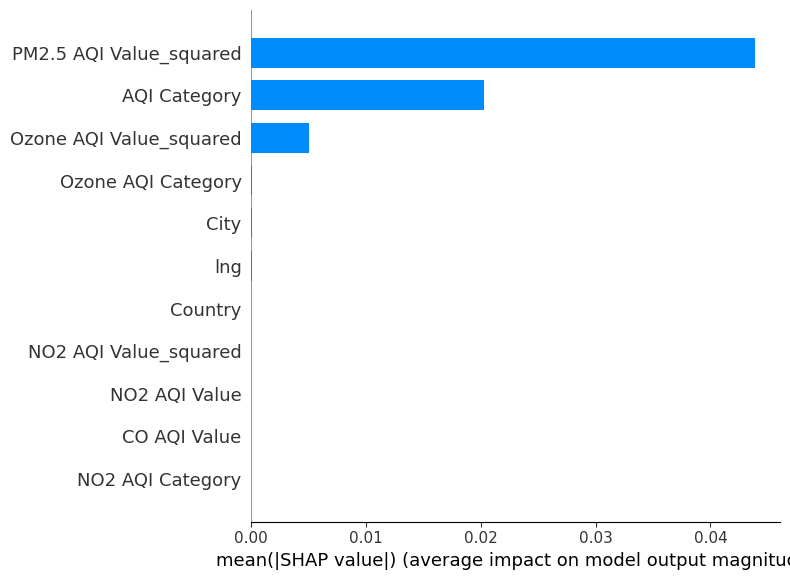

In [58]:
import shap
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

target_column = 'AQI Value'
X = data_no.drop(target_column, axis=1)
y = data_no[target_column]

# Split your data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Create a SHAP explainer
explainer = shap.TreeExplainer(rf_model)

# Compute SHAP values
shap_values = explainer.shap_values(X_test)

# Set the plot size to be larger
plt.figure(figsize=(16, 10))  # Adjust the size as needed to fit your number of features

# Plot SHAP values with feature names displayed
shap.summary_plot(shap_values, X_test, plot_type="bar", feature_names=X_test.columns, max_display=X_test.shape[1])

# Show the plot
plt.show()


 95%|=================== | 3105/3279 [00:18<00:01]       

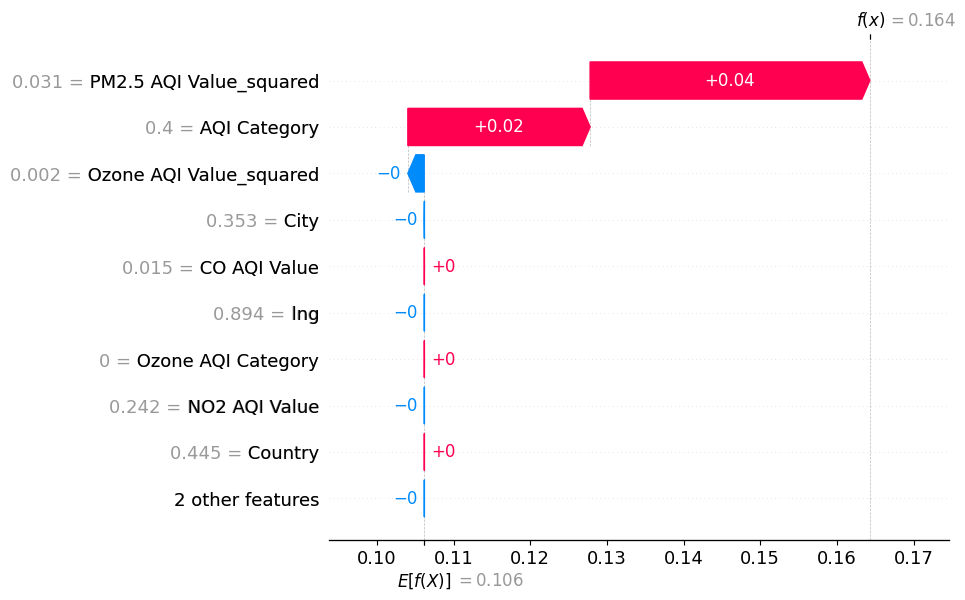

In [88]:
import shap
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor



X = data_no.drop(columns=['AQI Value'])
y = data_no['AQI Value']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor()
model.fit(X_train, y_train)

# Create the SHAP Explainer
explainer = shap.Explainer(model, X_train)

# Compute SHAP Values
shap_values = explainer(X_test)

# Visualize the SHAP Values for the first prediction
shap.plots.waterfall(shap_values[0])

In [83]:
data_s = data_h.as_data_frame()


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,4 hours 43 mins
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.1
H2O_cluster_version_age:,4 days
H2O_cluster_name:,H2O_from_python_unknownUser_ve71br
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,2.963 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


contributions progress: |████████████████████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O f

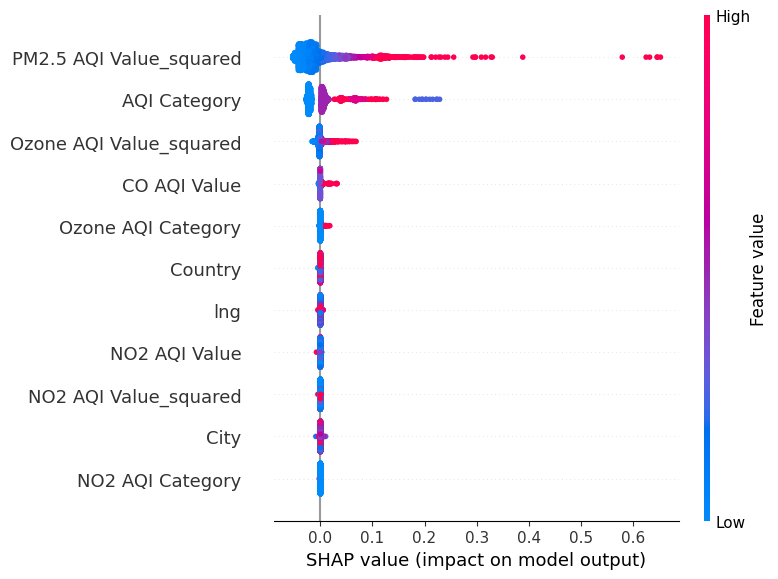

In [86]:
import h2o
from h2o.automl import H2OAutoML

# Initialize H2O
h2o.init()



best_model = h2o.get_model('GBM_3_AutoML_1_20240317_200150')


# Generate SHAP values using predict_contributions
shap_values = best_model.predict_contributions(test)

# Convert the SHAP values to a pandas DataFrame
shap_values_df = h2o.as_list(shap_values)

# Drop the last column which is the expected value (phi_0 in regression, phi in classification)
shap_values_df = shap_values_df.drop(columns=['BiasTerm'])

# Now convert your test data to a pandas DataFrame for use with SHAP's visualization
X_test_df = h2o.as_list(test.drop([target_column], axis=1))

# Visualize SHAP values using SHAP's visualization library
import shap

shap.initjs()  # Initialize JavaScript in Jupyter Notebook for visualizations

# Summarize the SHAP values in a plot
shap.summary_plot(shap_values_df.values, X_test_df, feature_names=X_test_df.columns)


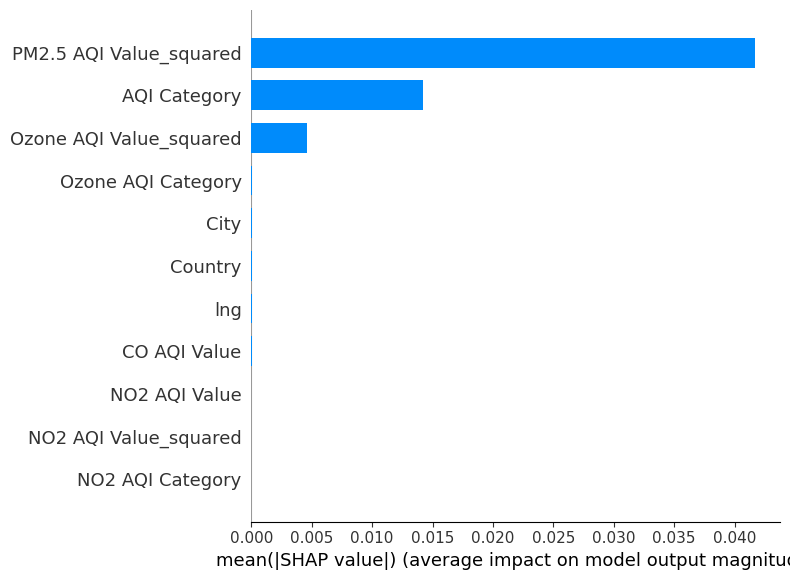

In [90]:
import shap
import matplotlib.pyplot as plt



# Bar Plot (Summary Plot) for feature importance across all samples
shap.summary_plot(shap_values, X_test, plot_type="bar")


# Show the plots
plt.show()


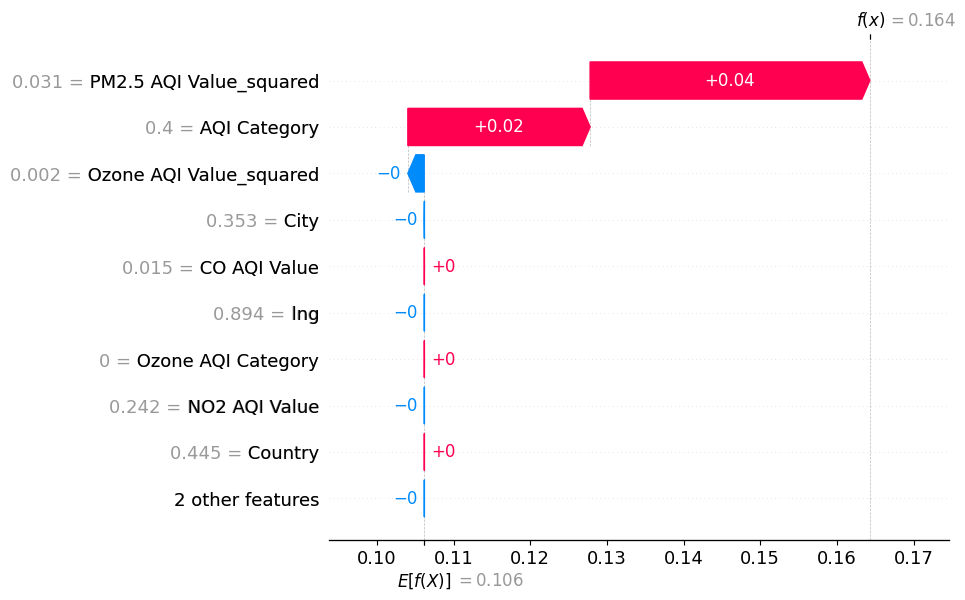

In [94]:
import shap

shap.plots.waterfall(shap_values[0])


In [112]:
data_no.columns

Index(['Country', 'City', 'AQI Value', 'AQI Category', 'CO AQI Value',
       'Ozone AQI Category', 'NO2 AQI Value', 'NO2 AQI Category', 'lng',
       'Ozone AQI Value_squared', 'NO2 AQI Value_squared',
       'PM2.5 AQI Value_squared'],
      dtype='object')

 99%|===================| 3251/3279 [00:19<00:00]       

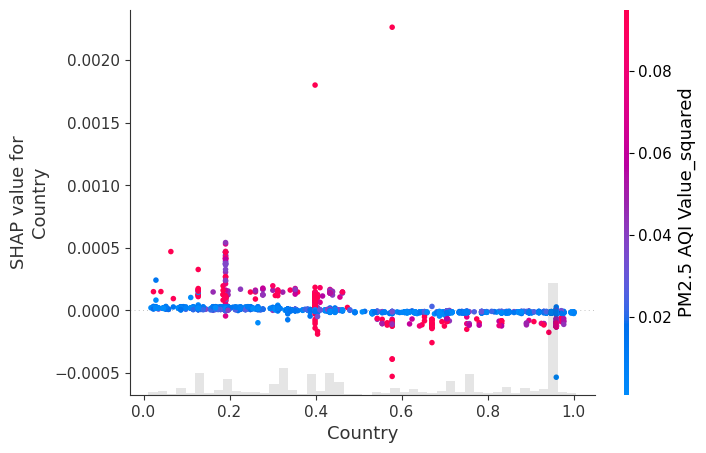

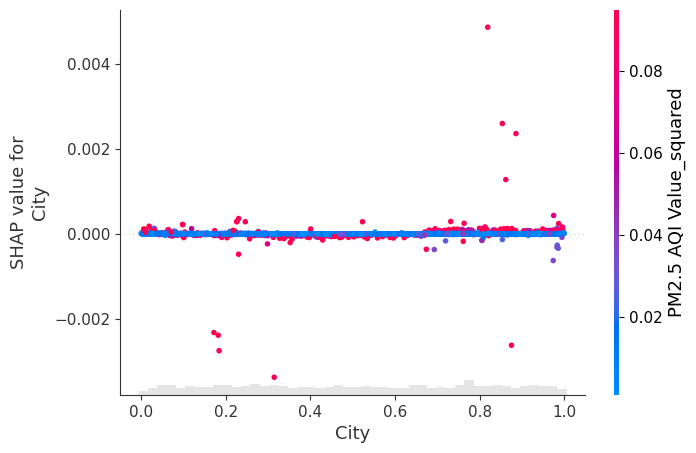

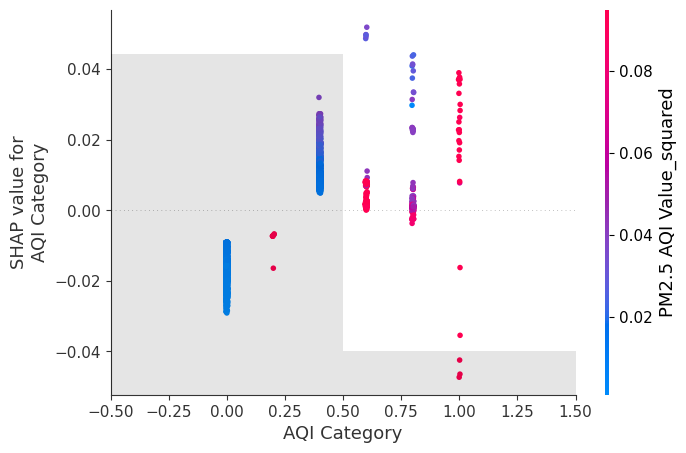

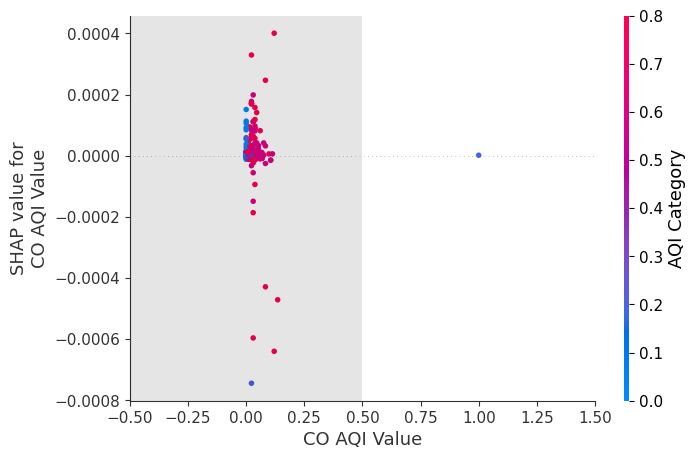

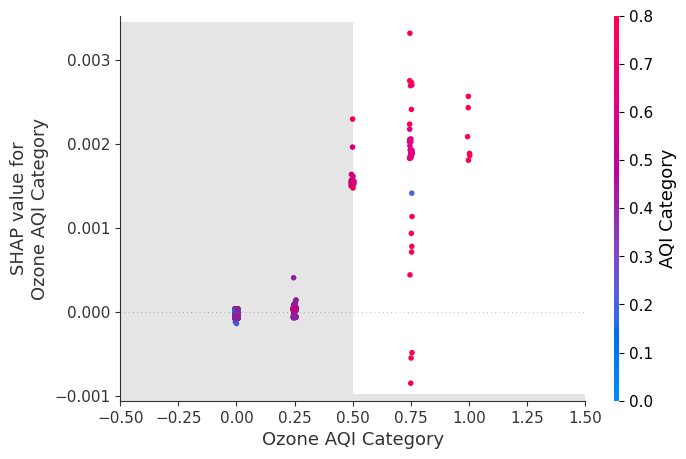

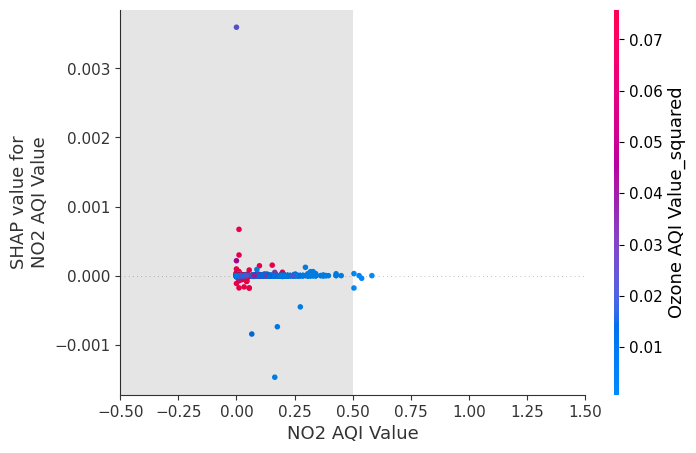

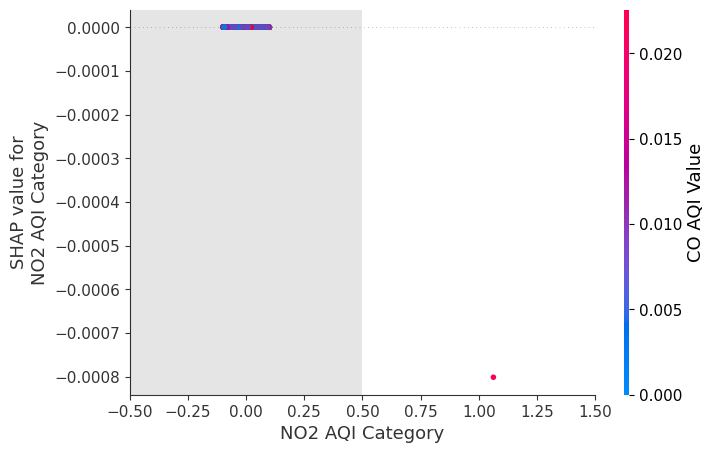

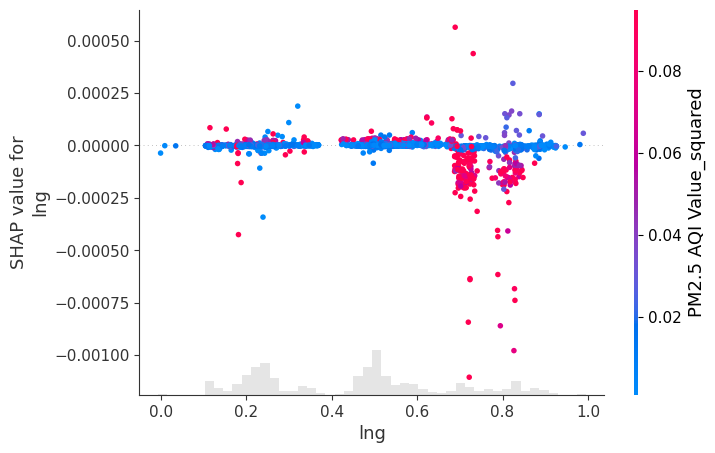

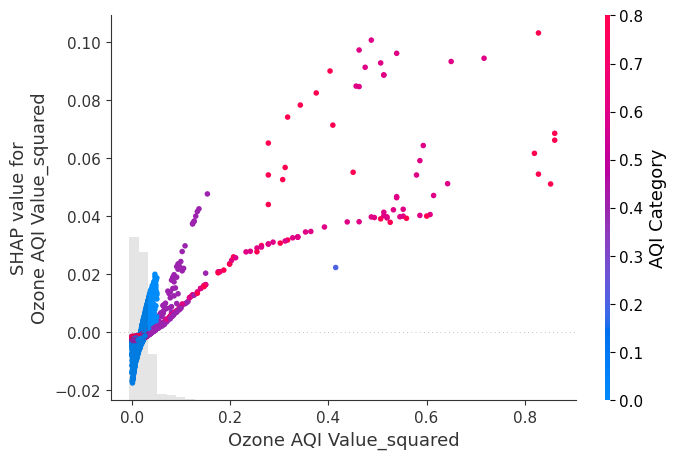

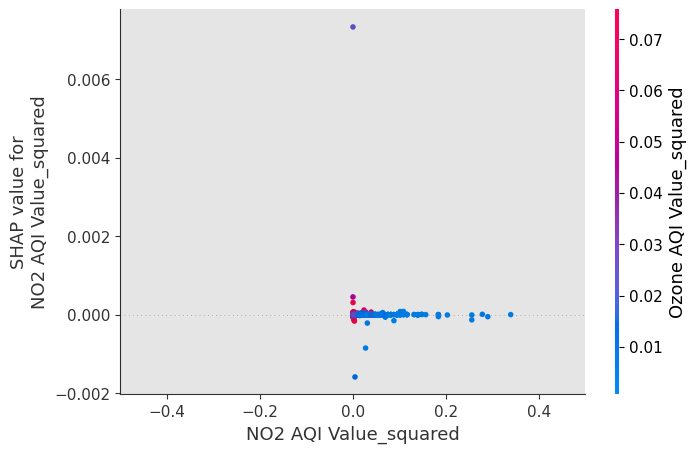

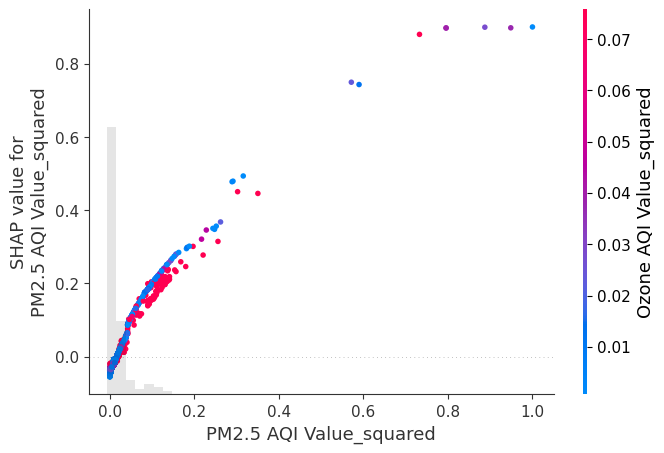

In [117]:
import pandas as pd
import shap
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor



# Proceed with your train-test split and model training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Create a SHAP explainer
explainer = shap.Explainer(model, X_train)

# Calculate SHAP values for the test set (or train set if you prefer)
shap_values = explainer(X_test)

# Define the features for which you want to generate PDPs
features_to_plot = ['Country', 'City', 'AQI Category', 'CO AQI Value',
                    'Ozone AQI Category', 'NO2 AQI Value', 'NO2 AQI Category', 'lng',
                    'Ozone AQI Value_squared', 'NO2 AQI Value_squared',
                    'PM2.5 AQI Value_squared']

# Loop through each feature and generate its PDP
for feature_name in features_to_plot:
    # Check if feature exists in the dataset
    if feature_name in X_train.columns:
        feature_index = X_train.columns.get_loc(feature_name)


        shap.plots.scatter(shap_values[:, feature_name], color=shap_values)
    else:
        print(f"Feature '{feature_name}' not found in the dataset.")


# Conclusion
Feature Importance Consistency:
The squared term of "PM2.5 AQI Value" consistently shows up as the most influential feature in predicting the Air Quality Index Value (AQI Value), according to SHAP value analysis across three different models. This consistency strengthens the evidence that the feature has a quadratic relationship with the target variable, meaning that not just the level of PM2.5 but the rate of its increase or decrease is crucial for predicting AQI.


# Summary

The finding that "PM2.5 AQI Value_squared" is the most impactful feature across different models points to its key role in the determination of AQI. This is indicative of a non-linear effect where higher levels of PM2.5 particulate concentration have an increasing rate of impact on AQI, a conclusion supported by the physical understanding of air quality factors. Such a finding would have direct implications for environmental policy and public health initiatives; it stresses the importance of aggressively managing and mitigating PM2.5 levels as they rise, due to their disproportionate effect on overall air quality.

In terms of model selection, while all models highlight the importance of "PM2.5 AQI Value_squared," the choice between models for predictive tasks would consider other factors such as overall performance, simplicity, and transparency of the model, as well as the capacity to generalize to unseen data.



# References

1. https://docs.h2o.ai/h2o/latest-stable/h2o-docs/automl.html

2. https://towardsdatascience.com/automated-machine-learning-with-h2o-258a2f3a203f

3. https://www.youtube.com/watch?v=L8_sVRhBDLU

4. https://en.wikipedia.org/wiki/Gradient_boosting

5. https://www.analyticsvidhya.com/blog/2020/02/4-boosting-algorithms-machine-learning/

6. https://www.youtube.com/watch?v=UJeu29wq7d0

7. https://github.com/aiskunks/YouTube/blob/main/A_Crash_Course_in_Statistical_Learning/Model_Interpretability/Model_Interpretability_Songs.ipynb

8. https://github.com/ajhalthor/model-interpretability/blob/main/Shap%20Values.ipynb


MIT License

Copyright (c) 2024 Pranav Kharat

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.